# Lab 17: Density Estimation and Clustering

*For the class on Wednesday, April 3rd*

## A. Kernel Density Estimation (KDE) and Gaussian Mixture Model (GMM)

We will use both the Kernel Density Estimation (KDE) and the Gaussian Mixture Model (GMM)
to estimate the density distribution of a mock data set with two features. 

The code also serves as an example of how to make a contour plot in Python. 

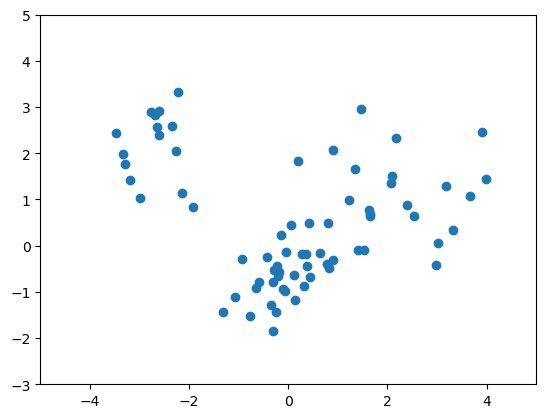

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

d = pd.read_csv("https://yymao.github.io/phys7730/data/lab17.csv")
xlim = (-5, 5)
ylim = (-3, 5)

plt.scatter(d.x, d.y)
plt.xlim(*xlim)
plt.ylim(*ylim);

(501, 501)


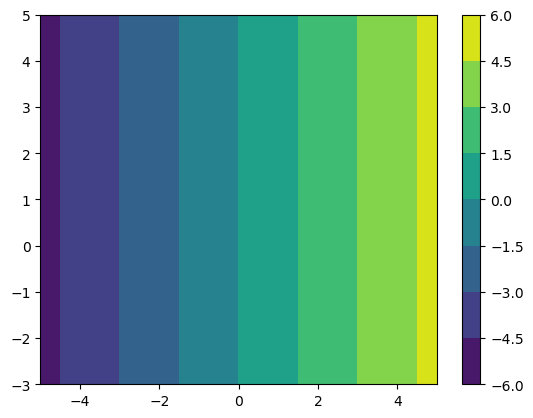

In [124]:
# Note that the variable `x`` is a 2D array the stores the value of x coordinate in the 2D space!
x, y = np.meshgrid(np.linspace(*xlim, num=501), np.linspace(*ylim, num=501))
print(x.shape)
cs = plt.contourf(x, y, x)
plt.colorbar(cs);

/home/yymao/miniforge3/envs/7730/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


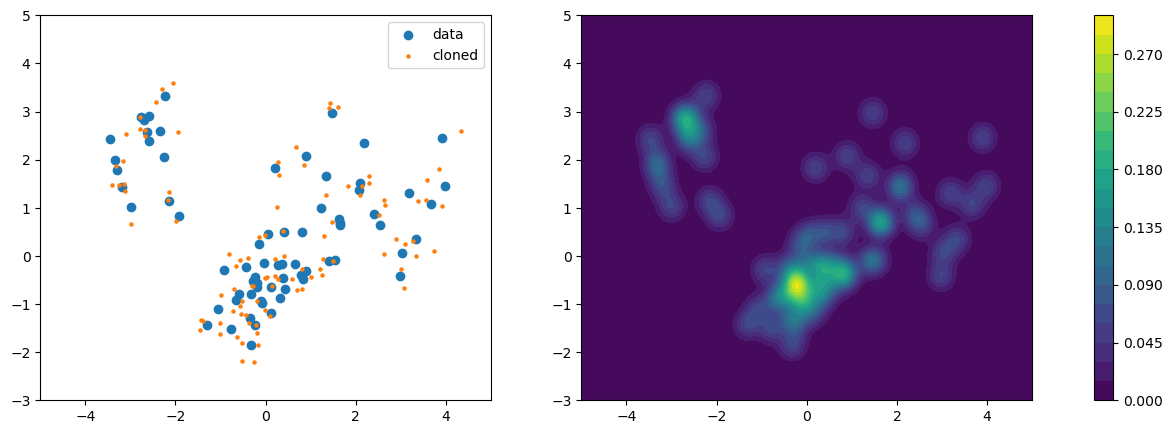

In [56]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(kernel='gaussian', bandwidth=0.2)
kde.fit(d)

fig, ax = plt.subplots(ncols=2, figsize=(16,5))

ax[0].scatter(d.x, d.y, label="data")
ax[0].scatter(*kde.sample(100).T, s=5, label="cloned")
ax[0].legend()

cs = ax[1].contourf(x, y, np.exp(kde.score_samples(np.stack([x.ravel(), y.ravel()]).T).reshape(x.shape)), levels=20)
plt.colorbar(cs, ax=ax)

for ax_this in ax:
    ax_this.set_xlim(*xlim)
    ax_this.set_ylim(*ylim);

/home/yymao/miniforge3/envs/7730/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


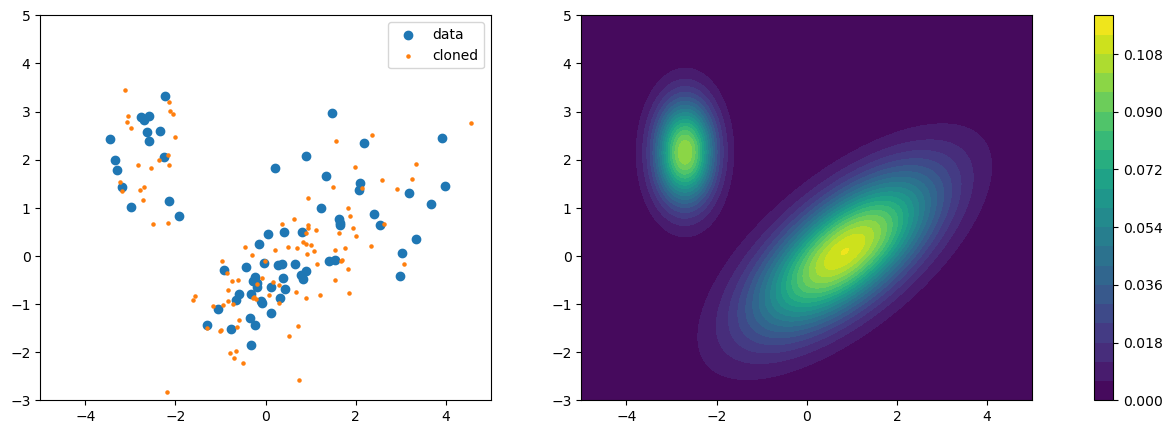

In [107]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2)
gmm.fit(d)

fig, ax = plt.subplots(ncols=2, figsize=(16,5))

ax[0].scatter(d.x, d.y, label="data")
ax[0].scatter(*gmm.sample(100)[0].T, s=5, label="cloned")  # note the slightly different return behavior of .sample()
ax[0].legend()

cs = ax[1].contourf(x, y, np.exp(gmm.score_samples(np.stack([x.ravel(), y.ravel()]).T).reshape(x.shape)), levels=20)
plt.colorbar(cs, ax=ax)

for ax_this in ax:
    ax_this.set_xlim(*xlim)
    ax_this.set_ylim(*ylim);

**Part A Questions 1-4**: 

1. What are the orange points in the plots above? 
2. Compare the estimated distributions from the KDE and GMM methods. How do they differ?
3. After you answer (2), adjust the `bandwidth` parameter for KDE (was set to 0.2) and
   the `n_components` parameter for GMM (was set to 2) until you think both methods are giving a good fit. 
4. After your adjustment in (3), compare again the estimated distributions from the KDE and GMM methods. How do they differ now?

--- 
*Write your answer to Part A Q1-4 here*

---

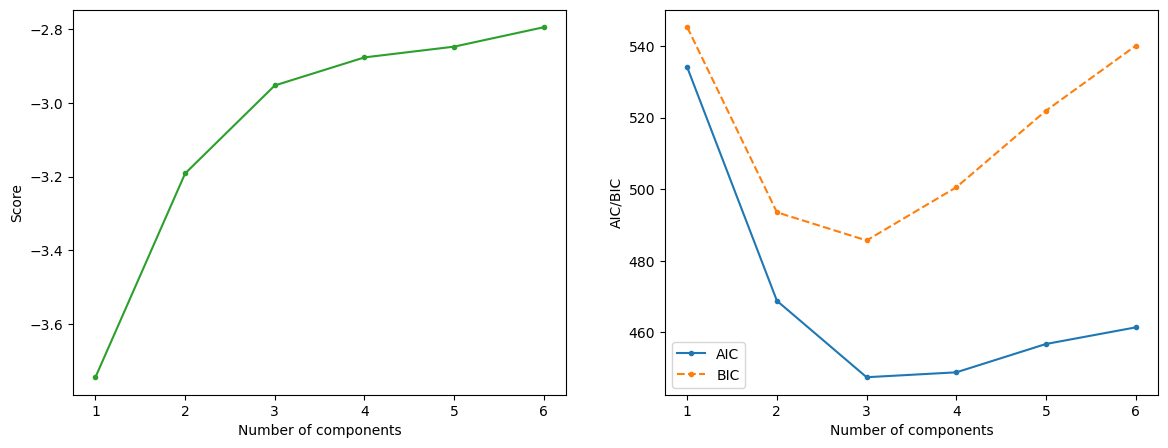

In [106]:
n_range = list(range(1, 7))

scores = []
aic = []
bic = []
for n_components in n_range:
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(d)
    scores.append(gmm.score(d))
    aic.append(gmm.aic(d))
    bic.append(gmm.bic(d))

fig, ax = plt.subplots(ncols=2, figsize=(14,5))

ax[0].plot(n_range, scores, marker=".", c="C2")
ax[0].set_xlabel("Number of components")
ax[0].set_ylabel("Score")

ax[1].plot(n_range, aic, label="AIC", marker=".")
ax[1].plot(n_range, bic, label="BIC", marker=".", ls="--")
ax[1].set_xlabel("Number of components")
ax[1].set_ylabel("AIC/BIC")
ax[1].legend()

**Part A Question 5**: 

5. Based on the plots above, what would be the best number of components to use for GMM?  How did you get your answer here? Does your answer agree with what you found in Q3?

--- 
*Write your answer to Part A Q5 here*

---

## B. Clustering (K-means and GMM)

Here we compare the K-means and GMM clustering methods on the same data set.

In [120]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters = 3  # TODO: change this when you answer Q3 below

clu = KMeans(n_clusters=n_clusters)
clu.fit(d)
cluster_labels = clu.predict(d)
print("Kmeans Silhouette", silhouette_score(d, cluster_labels))

gmm = GaussianMixture(n_components=n_clusters)
gmm.fit(d)
gmm_labels = gmm.predict(d)
print("GMM    Silhouette", silhouette_score(d, gmm_labels))


Kmeans Silhouette 0.5775226398780611
GMM    Silhouette 0.5775226398780611


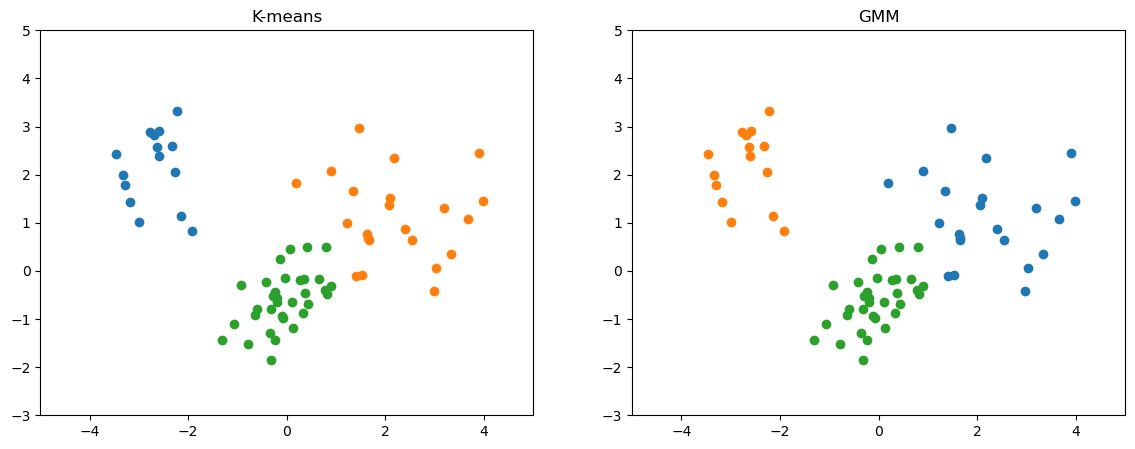

In [121]:
fig, ax = plt.subplots(ncols=2, figsize=(14,5))

for i in range(n_clusters):
    mask = (cluster_labels == i)
    ax[0].scatter(d.x[mask], d.y[mask])
    mask = (gmm_labels == i)
    ax[1].scatter(d.x[mask], d.y[mask])

ax[0].set_title("K-means")
ax[1].set_title("GMM")
for ax_this in ax:
    ax_this.set_xlim(*xlim)
    ax_this.set_ylim(*ylim);

**Part B Questions**:

1. For this data set, would you say the K-means and GMM methods give you consistent clustering result?
2. Rerun these two cells a few times. Does each run give you the same result, or are there any differences?
3. In the first cell of Part B, change to `n_clusters = 4` and rerun the two cells a few times. 
   Do K-means and GMM methods give you consistent clustering result every time you run them?
   Briefly (2-3 sentences) explain what you observe. 

--- 
*// Write your answer here*


---

:::{tip}
**How to submit this notebook on Canvas?**

1. Make sure all your answers, code, and desired results are properly displayed in the notebook.
2. Save the notebook (press `Ctrl`+`s` or `Cmd`+`s`). The grey dot on the filename tab (indicating "unsaved") should disappear. 
3. Run the following cell.
4. Upload the resulting HTML file to Canvas under the corresponding assignment. 
:::

In [ ]:
! jupyter nbconvert --to html ./17.ipynb